In [20]:
import PyDyTuesday 
import plotly.express as px

In [4]:
PyDyTuesday.get_date('2025-03-04')

LBACS-logo.png downloaded
lbacs-adoption-graph.png downloaded
longbeach.csv downloaded
meta.yaml downloaded
readme.md downloaded


In [5]:
import pandas as pd

df = pd.read_csv('longbeach.csv')
df.head()

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_condition,intake_type,...,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint
0,A693708,*charlien,dog,white,NaN,Female,2013-02-21,2023-02-20,ill mild,stray,...,2023-02-26,"[2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806",Long Beach,euthanasia,ill severe,33.804794,-118.188926,True,False,"33.8047935, -118.1889261"
1,A708149,NaN,reptile,brown,green,Unknown,NaN,2023-10-03,normal,stray,...,2023-10-03,"`600 BLK E HARCOURT, LB 90805",Long Beach,rescue,other resc,33.867999,-118.200931,False,True,"33.8679994, -118.2009307"
2,A638068,NaN,bird,green,red,Unknown,NaN,2020-01-01,injured severe,wildlife,...,2020-01-01,"0 BLK GRAND AVE, LONG BEACH, CA 90803",Long Beach,euthanasia,inj severe,33.760478,-118.148091,True,False,"33.7604783, -118.1480912"
3,A639310,NaN,bird,white,gray,Unknown,NaN,2020-02-02,ill severe,wildlife,...,2020-02-02,"0 BLK TEMPLE AVE, LONG BEACH, CA 90803",Long Beach,transfer,lbah,33.762460,-118.159678,False,True,"33.7624598, -118.1596777"
4,A618968,*morgan,cat,black,white,Female,2014-12-18,2018-12-18,injured severe,stray,...,2019-01-13,"0 BLK W ZANE ST, LONG BEACH, CA 90805",Long Beach,rescue,littlelion,33.849501,-118.194905,False,True,"33.8495009, -118.1949053"


In [6]:
len(df)

29787

In [7]:
df.columns

Index(['animal_id', 'animal_name', 'animal_type', 'primary_color',
       'secondary_color', 'sex', 'dob', 'intake_date', 'intake_condition',
       'intake_type', 'intake_subtype', 'reason_for_intake', 'outcome_date',
       'crossing', 'jurisdiction', 'outcome_type', 'outcome_subtype',
       'latitude', 'longitude', 'outcome_is_dead', 'was_outcome_alive',
       'geopoint'],
      dtype='object')

In [11]:
df.loc[0, :]

animal_id                                                    A693708
animal_name                                                *charlien
animal_type                                                      dog
primary_color                                                  white
secondary_color                                                  NaN
sex                                                           Female
dob                                                       2013-02-21
intake_date                                               2023-02-20
intake_condition                                            ill mild
intake_type                                                    stray
intake_subtype                                                   otc
reason_for_intake                                                NaN
outcome_date                                              2023-02-26
crossing             [2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806
jurisdiction                      

In [ ]:
df = df[['animal_id', 'animal_name', 'animal_type', 'primary_color',
       'secondary_color', 'sex', 'dob', 'intake_date', 'intake_condition',
       'intake_type', 'intake_subtype', 'reason_for_intake', 'outcome_date',
       'crossing', 'jurisdiction', 'outcome_type', 'outcome_subtype',
       'latitude', 'longitude', 'outcome_is_dead', 'was_outcome_alive',
       'geopoint']]

(array([6230.,    0., 6352.,    0.,    0., 5588.,    0., 4763.,    0.,
        6854.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

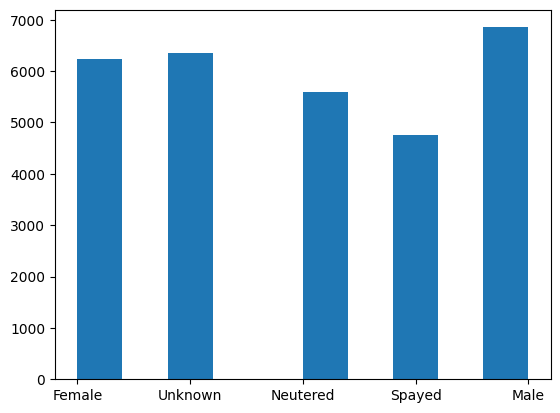

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['sex'])

['stray' 'wildlife' 'owner surrender' 'safe keep' 'confiscate'
 'welfare seized' 'return' 'quarantine' 'euthenasia required'
 'trap, neuter, return' 'foster' 'adopted animal return']


(array([2.5599e+04, 2.6150e+03, 1.3000e+02, 3.9900e+02, 4.8400e+02,
        3.0600e+02, 1.6200e+02, 1.5000e+01, 7.3000e+01, 4.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

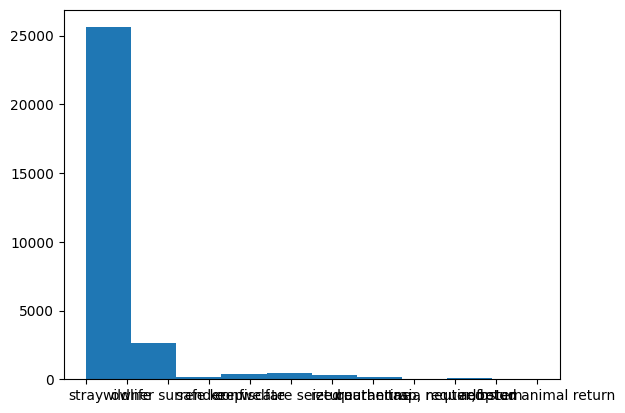

In [17]:
print(df['intake_type'].unique())

plt.hist(df['intake_type'])

In [18]:
file_path = "longbeach.csv"
df = pd.read_csv(file_path)

# Convert dates to datetime format
df['intake_date'] = pd.to_datetime(df['intake_date'], errors='coerce')
df['outcome_date'] = pd.to_datetime(df['outcome_date'], errors='coerce')

In [32]:
# Compute length of stay
df['length_of_stay'] = (df['outcome_date'] - df['intake_date']).dt.days

# --- 1. Intake Trends Over Time ---
df['intake_month'] = df['intake_date']
intake_trends = df.groupby('intake_month').size().reset_index(name='count')
fig1 = px.line(intake_trends, x='intake_month', y='count', title='Animal Intakes Over Time')
fig1.show()

In [33]:
outcome_counts = df['outcome_type'].value_counts().reset_index()
outcome_counts.columns = ['outcome_type', 'count']
fig2 = px.pie(outcome_counts, names='outcome_type', values='count', title='Distribution of Outcomes')
fig2.show()

In [38]:
import folium
from folium.plugins import HeatMap

map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)
heat_data = df[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data).add_to(m)
m

In [40]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age_at_intake'] = (df['intake_date'] - df['dob']).dt.days / 365.25
fig3 = px.histogram(df, x='age_at_intake', nbins=30, title='Age Distribution of Animals at Intake')
fig3.show()
